In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/obesity-classification-dataset/Obesity Classification.csv


## ***Import Libraries***

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


## ***Load Data***

In [3]:
data = pd.read_csv('/kaggle/input/obesity-classification-dataset/Obesity Classification.csv')

## ***Data Exploration***

In [4]:
data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [5]:
data.dtypes

ID          int64
Age         int64
Gender     object
Height      int64
Weight      int64
BMI       float64
Label      object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,108.0,56.046296,31.917939,1.0,28.75,56.5,83.25,110.0
Age,108.0,46.555556,24.720620,11.0,27.00,42.5,59.25,112.0
Height,108.0,166.574074,27.873615,120.0,140.00,175.0,190.00,210.0
Weight,108.0,59.490741,28.856233,10.0,35.00,55.0,85.00,120.0
BMI,108.0,20.549074,7.583818,3.9,16.70,21.2,26.10,37.2


In [8]:
data.isna().sum()

ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64

## ***Data PreProcessing***

In [9]:
labelencoder = LabelEncoder()

data['Gender'] = labelencoder.fit_transform(data['Gender'])

data.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,1,175,80,25.3,Normal Weight
1,2,30,0,160,60,22.5,Normal Weight
2,3,35,1,180,90,27.3,Overweight
3,4,40,0,150,50,20.0,Underweight
4,5,45,1,190,100,31.2,Obese


## ***Data Visualization***

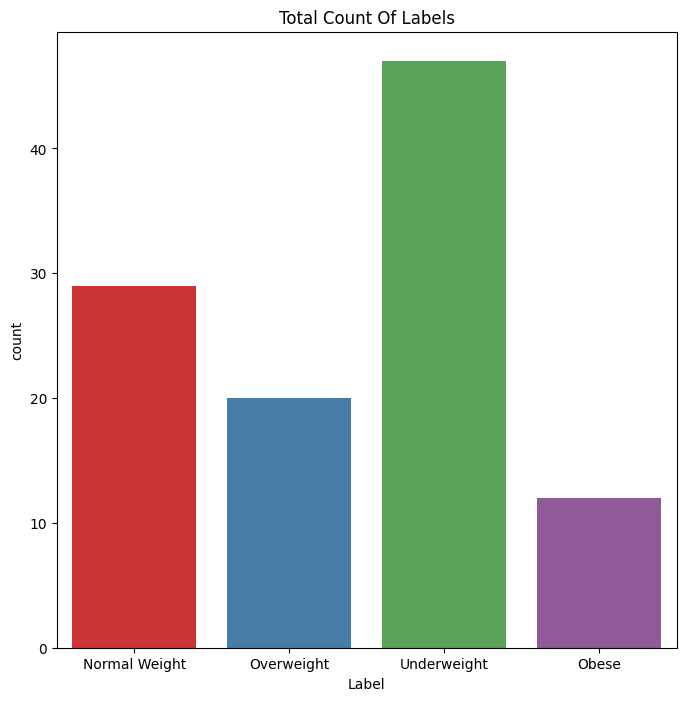

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(data=data , x = 'Label' , palette='Set1')
plt.title('Total Count Of Labels')
plt.show()

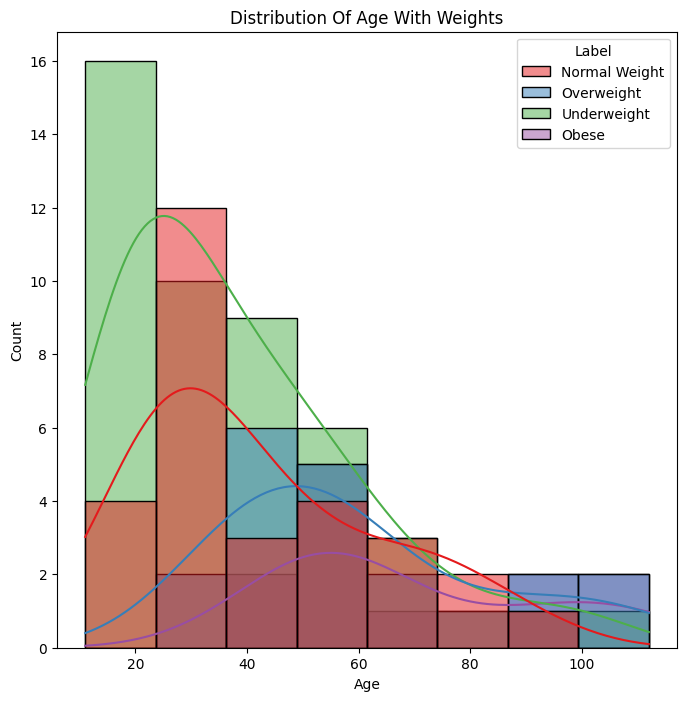

In [11]:
plt.figure(figsize=(8,8))
sns.histplot(data=data , x = 'Age' , hue = 'Label' , kde=True ,palette='Set1' )
plt.title('Distribution Of Age With Weights');
plt.show()

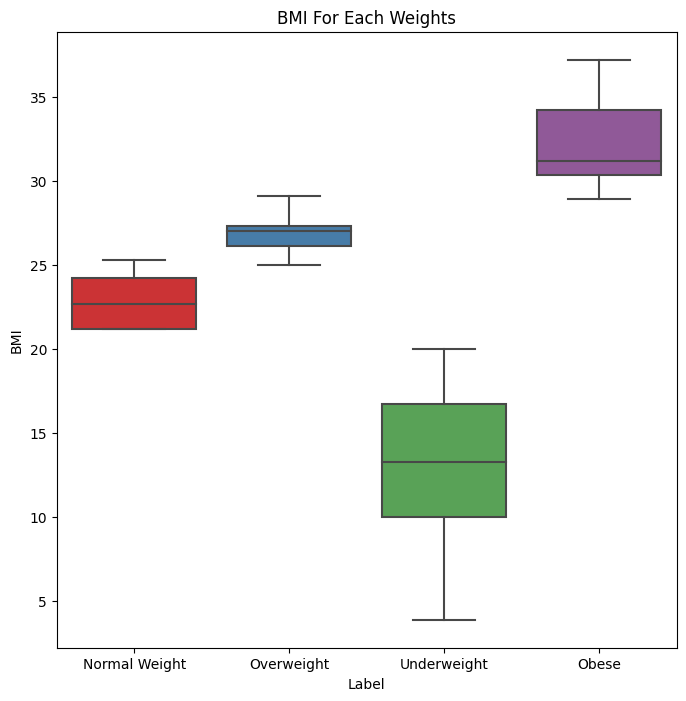

In [12]:
plt.figure(figsize=(8,8))
sns.boxplot(data=data,x='Label',y='BMI',palette='Set1')
plt.title('BMI For Each Weights');

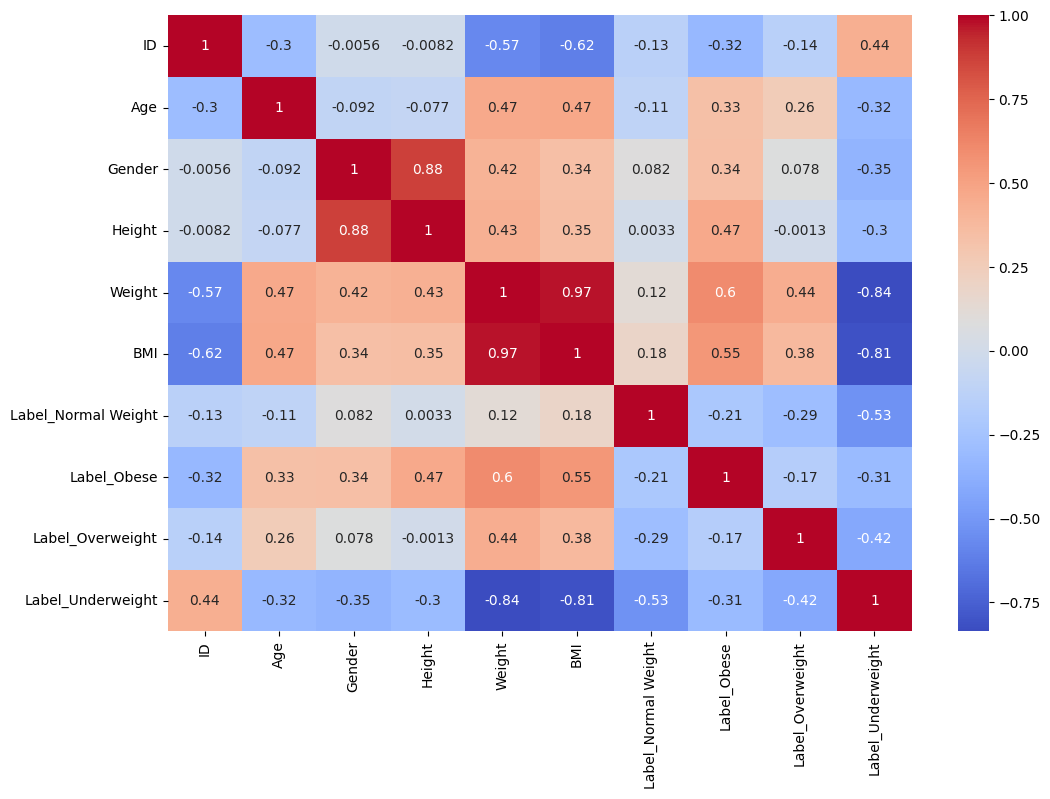

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.get_dummies(data).corr() ,annot=True,cmap='coolwarm')
plt.show()

## ***Build Our Model***

In [14]:
data = data.drop('ID' , axis = 1)

In [15]:
X = data.drop('Label', axis = 1)
y = data['Label']

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
print(X_train)

     Age  Gender  Height  Weight   BMI
64    46       1     200      85  26.1
26    98       1     200     110  34.2
22    78       1     180      90  27.3
31    29       1     180      85  26.1
47    62       0     120      85  27.5
..   ...     ...     ...     ...   ...
71    30       0     150      40  16.7
14    38       1     190      90  27.3
92    58       0     120      35  16.7
51    82       0     150      55  21.2
102   57       0     120      25  10.0

[86 rows x 5 columns]


In [18]:
print(y_train)

64        Overweight
26             Obese
22        Overweight
31        Overweight
47        Overweight
           ...      
71       Underweight
14        Overweight
92       Underweight
51     Normal Weight
102      Underweight
Name: Label, Length: 86, dtype: object


In [19]:
RF_clf = RandomForestClassifier()

RF_clf.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
y_pred =RF_clf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


**note: In some cases, if the model accuracy reaches 100%, it can lead to overfitting. However, in this particular case, that did not happen**